In [1]:
import argparse
from time import time

import numpy as np
import tensorflow as tf
from tensorflow.contrib.rnn import BasicLSTMCell
from tensorflow.contrib.rnn.python.ops.rnn_cell import PhasedLSTMCell
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops.rnn import dynamic_rnn
print(tf.__version__)

1.9.0


In [2]:
import os
import gzip
import io
import json
import pprint
import datetime
import math
import pickle

In [3]:
from dataset_delay_predictions import Dataset_Delay_Prediction, Dataset_Delay_Prediction_from_list, DatasetDelayPredictionStackOverflow

In [4]:
num_classes = 1
batch_size = 64


In [5]:
dataset_name = 'stack-overflow-dataset'
dataset_name = '2019-11-01-hellobank-only-converted-14-days'
dataset_name = '2019-10_11_12-dataset_delay_prediction'
pickle_filename = dataset_name.replace('/', '-')
print('Reading pickle file...')
dataset = pickle.load(open(pickle_filename, 'rb'))


Reading pickle file...


In [14]:
print(dataset)
number_of_dimensions = dataset.number_of_event
print(number_of_dimensions)

22


In [31]:
tf.reset_default_graph()
hidden_size = 100

steps = 21
lstm_cell=PhasedLSTMCell

learning_rate = 0.001
x_ = tf.placeholder(tf.float32, (batch_size, None, number_of_dimensions), name='x_')
t_ = tf.placeholder(tf.float32, (batch_size, None, 1), name='t_')
y_ = tf.placeholder(tf.float32, [batch_size, 1], name='y_')
seqlen_ = tf.placeholder(tf.int32, [batch_size], name='seqlen_')

inputs = (t_, x_)

outputs, _ = dynamic_rnn(cell=PhasedLSTMCell(hidden_size), 
                         inputs=inputs, 
                         dtype=tf.float32, 
                         sequence_length=seqlen_)

rnn_out = tf.squeeze(outputs[:, -1, :])
y = tf.contrib.layers.fully_connected(inputs=rnn_out,
                        num_outputs=num_classes)

#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
loss = tf.reduce_mean(tf.squared_difference(y,y_))
grad_update = tf.train.AdamOptimizer(learning_rate).minimize(loss)
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session(config=tf.ConfigProto(log_device_placement=False))
sess.run(tf.global_variables_initializer())

def feed_dict_phased_lstm():
    x,t,seqlen,y = dataset.next_for_separated_timestamps_and_events()
    return {x_: x, y_: y, t_:t, seqlen_:seqlen}

losses = []
print_step = 10
for i in range(steps):
    st = time()
    feed_dict = feed_dict_phased_lstm()
    
    tr_loss, tr_acc, _ = sess.run([loss, accuracy, grad_update], feed_dict=feed_dict)
    losses.append(tr_loss)
    if i % print_step == 0:
        print('steps = {0} | time {1:.2f} | tr_loss = {2:.3f} | tr_acc = {3:.3f}'.format(str(i).zfill(6),
                                                                                         time() - st,
                                                                                         tr_loss,
                                                                                         tr_acc))   

steps = 000000 | time 0.54 | tr_loss = 0.000 | tr_acc = 1.000
steps = 000010 | time 0.62 | tr_loss = 0.000 | tr_acc = 1.000
steps = 000020 | time 0.31 | tr_loss = 0.000 | tr_acc = 1.000


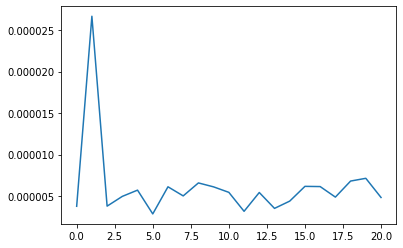

In [32]:
from matplotlib import pyplot as plt
x = [i for i in range(len(losses))]
plt.plot(x,losses)
plt.show()

In [15]:
feed_dict = feed_dict_phased_lstm()

In [7]:
x,t,seqlen,y = dataset.next_for_separated_timestamps_and_events()

In [8]:
print(seqlen[0])

17


In [25]:

dataset_name = '2019-11-01-hellobank-only-converted-14-days'
dataset_name = '2019-10_11_12-dataset_delay_prediction'
dataset_name = 'stack-overflow-dataset'
pickle_filename = dataset_name.replace('/', '-')
print('Reading pickle file...')
dataset = pickle.load(open(pickle_filename, 'rb'))

Reading pickle file...


In [26]:
x,t,seqlen,y = dataset.next_for_separated_timestamps_and_events()

In [27]:
seqlen[0]

101

In [28]:
print(dataset)

In [29]:
full_features = dataset.full_features_dt
full_features_log = dataset.full_features_log

In [30]:
for i in range(10):
    print(full_features[i][-1][-1])
    print(full_features_log[i][-1][-1])

27834026.293000937
0.03422086552072164
1357904246.5679991
0.9926536124473108
1364123099.4950004
0.9955319931297468
28355543.438999414
0.034851005351431055
1365386640.0880008
0.9961158084421115
1353601835.349
0.990657392244463
1360952568.7100005
0.9940655560582332
1359420997.943
0.993356401369638
28227134.206999063
0.0346958876194745
32317484.027000427
0.03962522452245139
